# Sentiment Analysis

The dataset for this exercise can be found in the data folder (downloaded from https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)

Sentiment Analysis is a supervised machine-learning technique, to use the postive, neutral and negative responses from customers as analysis for general feeling towards an airline company.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
airline = pd.read_csv('data/AirlineTweets.csv')

In [3]:
airline.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# The only columns that matter are 'airline_sentiment' and 'text'
df = airline[['airline_sentiment', 'text']]

In [5]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [6]:
# 14,640 rows

df.shape

(14640, 2)

In [7]:
# Positive statement!

df['text'].iloc[1]

"@VirginAmerica plus you've added commercials to the experience... tacky."

In [8]:
# Neutral statement

df['text'].iloc[0]

'@VirginAmerica What @dhepburn said.'

In [9]:
# Negative statement

df['text'].iloc[4]

"@VirginAmerica and it's a really big bad thing about it"

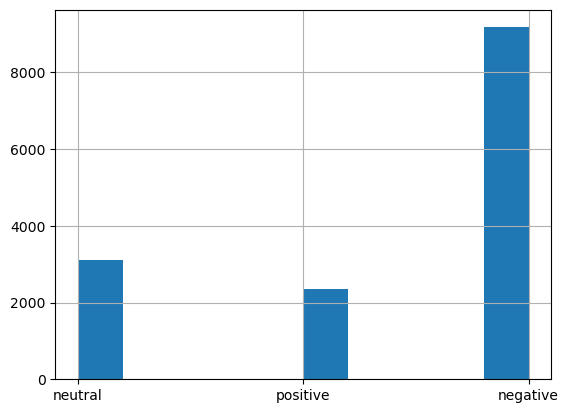

In [10]:
df['airline_sentiment'].hist();

The classes in the dataset are imbalanced - in particular the negative comments are greatly over-represented.

It is recommended to use **F1-score**, **AUC score** and the **confusion matrix** when assessing model performance.

In [11]:
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}

df['target'] = df.loc[:, 'airline_sentiment'].map(target_map)

C:\Users\shmel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


## Run text through Logistic Regression model

Text must be train-test-split and vectorized before running through the Logistic Regression model, and in this exercise, you are going to use the TF-IDF vectorizer from SciKit-Learn, `TfidfVectorizer()`.

In [13]:
df_train, df_test = train_test_split(df)

In [14]:
len(df_train)

10980

In [15]:
len(df_test)

3660

In [16]:
vectorizer = TfidfVectorizer(max_features=2000)

In [17]:
X_train = vectorizer.fit_transform(df_train['text'])

X_test = vectorizer.transform(df_test['text'])

In [18]:
y_train = df_train['target']

y_test = df_test['target']

In [19]:
model = LogisticRegression(max_iter=500)

model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 0.8548269581056467
Test accuracy: 0.7991803278688525


In [20]:
# Model accuracy on training set is higher, as expected
# Model accuracy on test set is approx. 80%, which is not bad considering class imbalance

In [21]:
# Use predicted labels and predicted probabilities to test with other metrics

y_pred = model.predict(X_test)

y_pred_prob = model.predict_proba(X_test)

In [22]:
# The predicted probabilities for each class (0 negative, 1 positive, 2 neutral)

y_pred_prob

array([[0.16239875, 0.64575804, 0.19184321],
       [0.76451504, 0.01404941, 0.22143555],
       [0.17768924, 0.6056237 , 0.21668706],
       ...,
       [0.88912989, 0.03865064, 0.07221947],
       [0.8926502 , 0.02655642, 0.08079338],
       [0.24040636, 0.18196728, 0.57762637]])

In [23]:
# ROC-AUC score (quite good - approx 90% correct predictions)

print("Test AUC score:", roc_auc_score(y_test, y_pred_prob, multi_class='ovo'))

Test AUC score: 0.8954014788450794


In [24]:
def plot_cm(cm):
    classes = ['negative', 'positive', 'neutral'] 
    df_cm = pd.DataFrame(cm, index=classes, columns=classes) 
    ax = sn.heatmap(df_cm, annot=True, fmt='g') 
    ax.set_xlabel("Predicted") 
    ax.set_ylabel("Target")

In [25]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

In [26]:
cm

array([[0.93059799, 0.01658664, 0.05281536],
       [0.24537815, 0.63865546, 0.11596639],
       [0.40826873, 0.05813953, 0.53359173]])

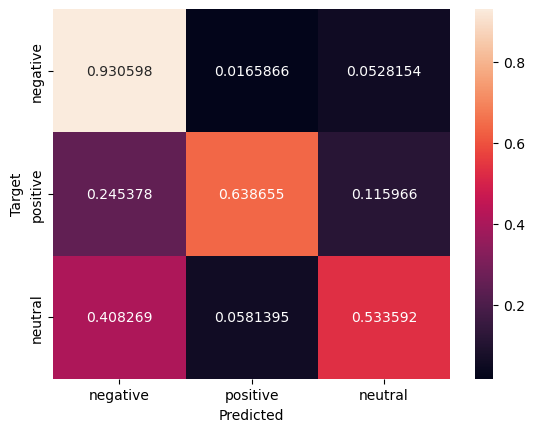

In [27]:
plot_cm(cm)

In [28]:
# The model performs very well for negative class - 0.93 for true positives so large bias towards this class
# The predictions for positive class are OK with 0.64 for true positives
# The predictions for neutral class are approx 50-50 chance for true positives, i.e. random chance

## Binary labels and model interpretation

What if you forced the number of classes from 3 to 2, i.e. negative and positive outcomes only. Since the model appears to randomly predict neutral classes, you could remove all neutral comments from the dataset (the dataset will still be imbalanced). 

You should keep all data belonging to classes 0 and 1 from the original data, and re-fit the vectorizer before creating a new model. 

In [29]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [30]:
X_train_bin = df_train[df_train['target'].isin([0, 1])]

X_test_bin = df_test[df_test['target'].isin([0, 1])]

In [31]:
X_train_bin.sample(10)

,airline_sentiment,text,target
3970,negative,"@united again, you said to go take the time to...",0
2816,negative,@united why? So I can waste more of time on th...,0
6266,positive,@SouthwestAir thank you!!!,1
12349,negative,@AmericanAir when the pilot announces that the...,0
4678,negative,"@SouthwestAir Sorry to bother you, but I've be...",0
13141,negative,@AmericanAir served the nastiest food Ive ever...,0
14149,negative,@AmericanAir big surprise flight 2330 is delay...,0
957,negative,@united i need it there before she lands so sh...,0
11310,negative,@USAirways I have been doing that all day. Can...,0
11879,negative,@AmericanAir why would I even consider continu...,0


In [32]:
# Re-fit the vectorizer (many words may have been removed with neutral comments)

X_train = vectorizer.fit_transform(X_train_bin['text'])

X_test = vectorizer.transform(X_test_bin['text'])

In [33]:
y_train = X_train_bin['target']

y_test = X_test_bin['target']

In [34]:
logreg = LogisticRegression(max_iter=500)

logreg.fit(X_train, y_train)

print("Training accuracy:", logreg.score(X_train, y_train))
print("Test accuracy:", logreg.score(X_test, y_test))

Training accuracy: 0.9300982091276718
Test accuracy: 0.9147609147609148


Already there a huge improvement in accuracy of the output. As expected, the training score is higher, but we have approx. 91% accuracy in the test set.

In [35]:
# For binary classification AUC score, you only need the probability for 1 (positive) outcome

predict_prob = logreg.predict_proba(X_test)[:, 1]

print("Test AUC:", roc_auc_score(y_test, predict_prob))

Test AUC: 0.9533010061292087


In [36]:
# Much better model performance - 95% of predictions are correctly made

In [37]:
predict_labels = logreg.predict(X_test)

In [38]:
cm_bin = confusion_matrix(y_test, predict_labels)

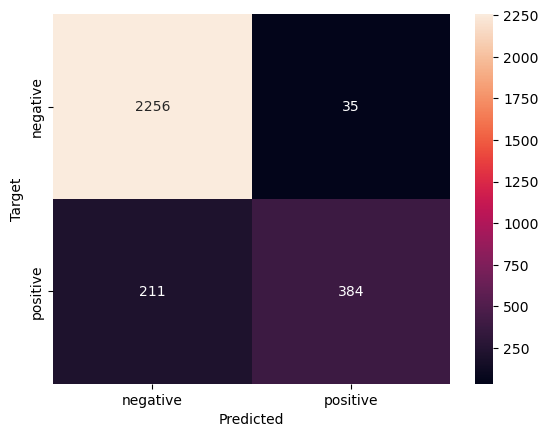

In [39]:
def plot_cm_bin(cm):
    classes = ['negative', 'positive'] 
    df_cm = pd.DataFrame(cm, index=classes, columns=classes) 
    ax = sn.heatmap(df_cm, annot=True, fmt='g') 
    ax.set_xlabel("Predicted") 
    ax.set_ylabel("Target")

plot_cm_bin(cm_bin)

246 misclassified labels, which are mostly positive comments incorrectly classified as negative. In the case where the airline wants to know about negative comments, this is not a problem. If the airline is looking for positive outcomes, this could be detrimental.

### Interpreting model 'weights'

In [40]:
# Obtain the model 'weights' - coefficients for each feature or word

logreg.coef_

array([[-0.25739278, -0.13377981, -0.34118084, ...,  0.49951607,
         0.00725632, -0.61652739]])

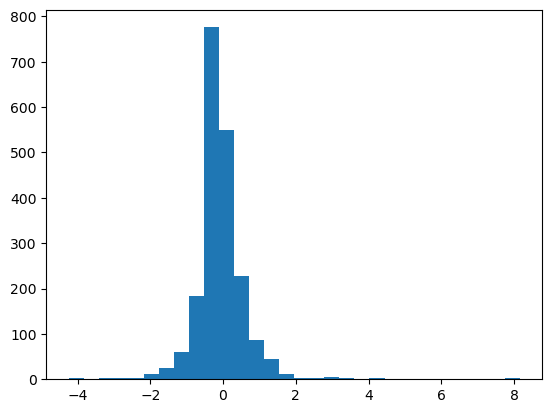

In [41]:
# Plot coefficient values - note that coefficients are in nested list ([0])

plt.hist(logreg.coef_[0], bins=30);

In [42]:
# Most 'weights' centered around zero
# Some outliers around -4, 3, 4 and 8...these most impact the target output, negatively or positively

In [43]:
# Obtain the vocabulary dictionary from vectorizer

word_map = vectorizer.vocabulary_

In [44]:
type(word_map)

dict

In [51]:
# Where 'word' is the key and index number is the value

word_map['good']

808

In [52]:
# Look at the 'weights' for words above and below a coefficient value of 2

threshold = 2

print("Most positive words (above coefficient of 2):\n")

for word, index in word_map.items():
    weight = logreg.coef_[0][index] 
    
    if weight > threshold:
        print(word, weight)

Most positive words (above coefficient of 2):

southwestair 2.860075665253293
thank 8.070503978172589
great 5.20873389706136
best 3.636864282503425
virginamerica 3.2284047966366294
thx 2.8083250880436763
jetblue 3.021616302194394
good 3.261536914324663
thanks 8.15794549579575
love 4.405152711198492
appreciate 2.9299264512386207
awesome 4.054714104309307
cool 2.0881519342983204
kudos 2.6141836316289337
amazing 4.19464795567824
worries 2.711651303849786
wonderful 2.120412437543374


In [ ]:
# Words like 'great', 'wonderful', 'awesome' etc. mean positive comments on the airline

In [53]:
print("Most negative words (below coefficient of -2):\n")

for word, index in word_map.items():
    weight = logreg.coef_[0][index] 
    
    if weight < -threshold:
        print(word, weight)

Most negative words (below coefficient of -2):

hours -3.180120172868922
not -4.237871165068018
delayed -2.704527096069908
hour -2.0696846300381058
but -2.2210484579850025
cancelled -2.677062192785016
nothing -2.0768244800471
what -2.0143761861748595
no -3.9708361705076376
worst -3.190035509719835
hold -2.7902315406903693
why -2.2269879894607354
luggage -2.1625444978103463


In [ ]:
# Words like 'delayed', 'cancelled', 'worst' etc. mean negative comments on the airline

### EXERCISE: Print the most-wrong reviews for both classes


* Find the negative review where the output probability `p(y = 1 | x)` is closest to 1. This means, out of all the negative comments that were incorrectly predicted as positive, this review is the one the model the model got most wrong.

* Find a positive review where the output probability `p(y = 1 | x)` is closest to 0. This means, out of all the positive comments that were incorrectly predicted, this is the one the model got most wrong.

**Print the probability values also.**

In [56]:
# Contains actual target values - add predicted labels and probabilities
X_test_bin.head()

,airline_sentiment,text,target
8515,positive,@JetBlue I'll pass along the advice. You guys ...,1
3439,negative,@united I sent you a dm with my file reference...,0
6439,positive,@SouthwestAir Black History Commercial is real...,1
5112,negative,@SouthwestAir why am I still in Baltimore?! @d...,0
5645,positive,@SouthwestAir SEA to DEN. South Sound Volleyba...,1


In [ ]:
test_data = X_test_bin.copy()

In [57]:
# Contains predicted target values
test_data.loc[:, 'predictions'] = logreg.predict(X_test)

C:\Users\shmel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
# Contains predicted probabilities (positive probability outcomes)
test_data.loc[:, 'probability_preds'] = logreg.predict_proba(X_test)[:, 1]

C:\Users\shmel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
test_data.head()

,airline_sentiment,text,target,predictions,probability_preds
8515,positive,@JetBlue I'll pass along the advice. You guys ...,1,1,0.678167
3439,negative,@united I sent you a dm with my file reference...,0,0,0.027243
6439,positive,@SouthwestAir Black History Commercial is real...,1,1,0.656320
5112,negative,@SouthwestAir why am I still in Baltimore?! @d...,0,0,0.039823
5645,positive,@SouthwestAir SEA to DEN. South Sound Volleyba...,1,1,0.576132


#### Most incorrectly predicted negative comment on airline

The model obviously has a hard time understanding sarcasm.

In [64]:
# 1) All negative comments that are incorrectly predicted as positive

incorrect_negs = test_data[(test_data['predictions'] == 1) & (test_data['target'] == 0)]

In [67]:
# 2) Sort by predicted probabilities in descending order
incorrect_negs.sort_values(by='probability_preds', ascending=False).head()

,airline_sentiment,text,target,predictions,probability_preds
4569,negative,"@SouthwestAir oh, ok! all good! looking forw...",0,1,0.966299
7540,negative,@JetBlue Thanks for the THIRD gate change http...,0,1,0.892955
875,negative,@united Dmed you. Thank you,0,1,0.870627
7634,negative,@JetBlue I travel for business twice a week an...,0,1,0.712823
12493,negative,@AmericanAir thanks for the canned reply.,0,1,0.703868


In [76]:
# This negative comment was most incorrectly predicted (0.97 probability of being positive)

incorrect_negs.loc[4569, 'text']

'@SouthwestAir oh, ok!  all good!  looking forward to escaping the cold for a bit!  thanks!'

#### Most incorrectly predicted positive comment on airline

In [69]:
# 1) All positive comments that are incorrectly predicted as negative

incorrect_posits = test_data[(test_data['predictions'] == 0) & (test_data['target'] == 1)]

In [72]:
# 2) Sort by predicted probabilities

incorrect_posits.sort_values(by='probability_preds').head()

,airline_sentiment,text,target,predictions,probability_preds
6917,positive,"@JetBlue Not trying to make you look bad, on y...",1,0,0.020824
12625,positive,@AmericanAir No apology necessary. It was wind...,1,0,0.033795
1613,positive,@united can Cancelled Flight my flight anytime...,1,0,0.041129
10664,positive,@USAirways but don't worry! They found a hotel...,1,0,0.045347
8393,positive,"@JetBlue no, but we're on the flight leaving f...",1,0,0.045901


In [73]:
# This positive comment was most incorrectly predicted (0.02 probability of being positive)

incorrect_posits.loc[6917, 'text']

'@JetBlue Not trying to make you look bad, on your website it says: "Due to weather in the Charleston, NC" Its actually in SC, not NC'

## Adding 'weight' to model loss function

When the classes are imbalanced as is the case in this dataset, you can help the model by setting its parameter `class_weight='balanced'` to 'weight' the loss function:

`model = LogisticRegression(class_weight='balanced', max_iter=500)`

The 'balanced' mode uses the actual target values to automatically adjust the model 'weights' as inversely proportional to the class frequencies in the input data.

**Re-build your Logistic Regression for the binary data using this hyperparameter.**

In [77]:
model_weight = LogisticRegression(class_weight='balanced', max_iter=500)

model_weight.fit(X_train, y_train)

print("Training accuracy:", model_weight.score(X_train, y_train))
print("Test accuracy:", model_weight.score(X_test, y_test))

Training accuracy: 0.940843443096476
Test accuracy: 0.9095634095634095


In [78]:
probs = model_weight.predict_proba(X_test)[:, 1]

print("Test AUC:", roc_auc_score(y_test, probs))

Test AUC: 0.9546427562731771


In [79]:
# Doesn't make much of a difference...

preds = model_weight.predict(X_test)

conf_matrix = confusion_matrix(y_test, preds)

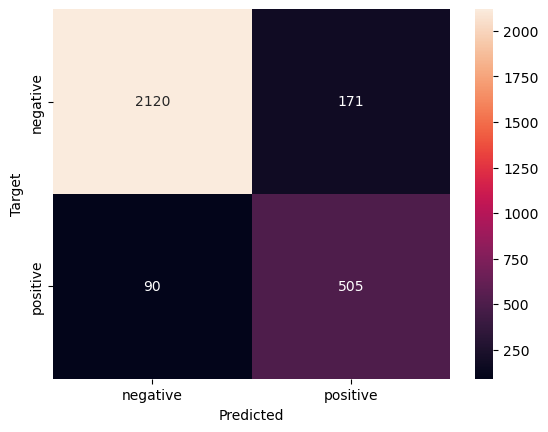

In [80]:
plot_cm_bin(conf_matrix)

#### 261 misclassified labels - more than the classification model without weighted loss function